In [1]:
from deep_decoder_nw import build_decoder, train_and_save
from helper import *
from tensorflow.keras.layers import Input, Lambda, Layer, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Conv2DTranspose, Reshape, LeakyReLU, Flatten, Dense, UpSampling2D
from tensorflow.keras import Model, Sequential
from pathlib import Path
from tqdm.keras import TqdmCallback

latent_dim = 128

def inpaint_img(img):
    mask = load_mask('test_data/')
    img_noisy = img * mask
    return img_noisy, mask

img_clean = load_img('test_data/', 'astronaut')

Using TensorFlow backend.


Tensorflow version 2.1.0


In [2]:
img_noisy, mask = inpaint_img(img_clean)
img_clean.shape, img_noisy.shape, mask.shape

((512, 512, 3), (512, 512, 3), (512, 512, 1))

In [3]:
latent_code_shape = [16, 16, latent_dim]
latent_code = np.reshape(np.random.normal(size=latent_code_shape), [1, 16, 16, latent_dim])
latent_code.shape, img_clean.shape, img_noisy.shape

((1, 16, 16, 128), (512, 512, 3), (512, 512, 3))

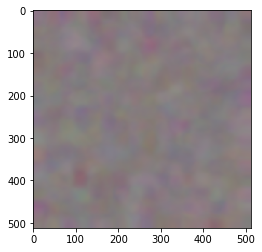

In [4]:
decoder = build_decoder(latent_dim)
plt.imshow(decoder.predict(latent_code)[0])

In [10]:
# for inpainting recovery
def recover(latent_code, img_noisy, mask, epochs=800):
    y = np.reshape(img_noisy, (1, 512, 512, 3))
    decoder.add(Lambda(lambda x: x * mask))
    
    train_and_save(
        model=decoder,
        path=Path('./deepdecoder_inpaint.h5'),
        x=latent_code,
        y=y,
        batch_size=1,
        verbose=0,
        epochs=epochs,
        callbacks=[TqdmCallback(verbose=1)],
    )

In [7]:
recover(latent_code, img_noisy, mask, epochs=200)

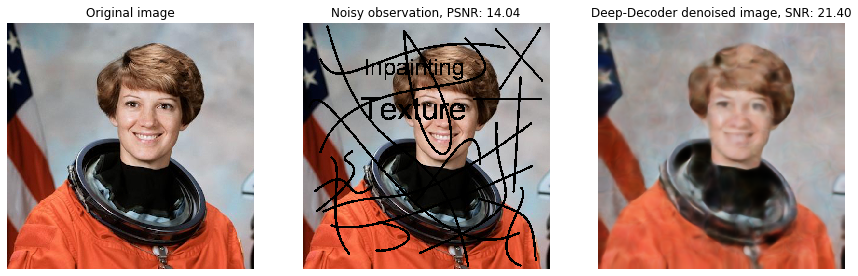

In [9]:
net = build_decoder(latent_dim) # new net for prediction (without the mask)
net.load_weights(str(Path('./deepdecoder_inpaint.h5')))
out_img = net.predict(latent_code)[0]
plot_results(out_img, img_clean, img_noisy) # 200 epochs

In [11]:
recover(latent_code, img_noisy, mask, epochs=800)

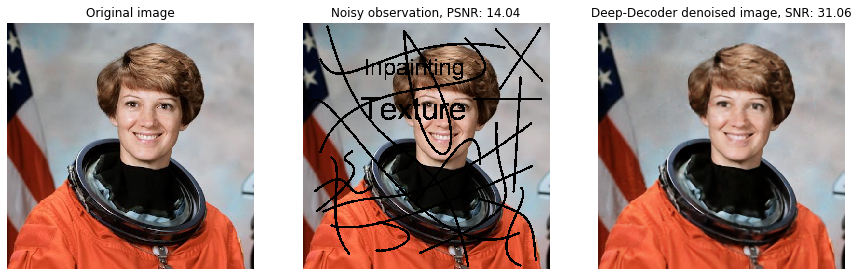

In [12]:
net = build_decoder(128)
net.load_weights(str(Path('./deepdecoder_inpaint.h5')))
out_img = net.predict(latent_code)[0]
plot_results(out_img, img_clean, img_noisy) # 1000 epochs